# Exploratory Data Analysis and Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [2]:
file = "train.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


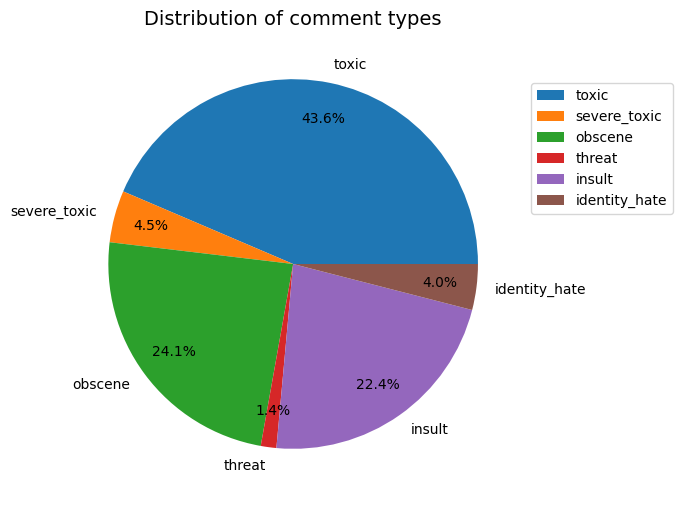

In [5]:
# Distribution of comment types
temp = {}
for x in df.columns[2:]:
    temp[x] = df[x].sum()

plt.figure(figsize=(7, 6))
plt.pie(temp.values(),
        labels=temp.keys(),
        autopct='%1.1f%%',
        pctdistance=0.80
       )
plt.title('Distribution of comment types', size=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0, 1, 1.5))
plt.show()

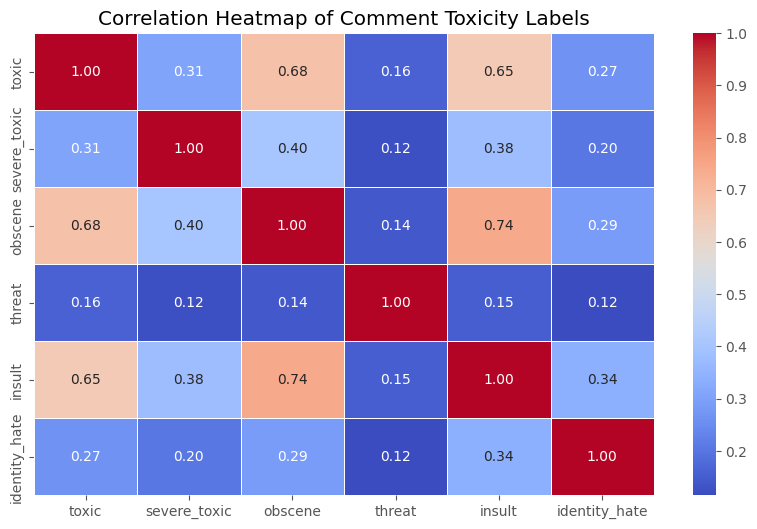

In [6]:
plt.style.use('ggplot')

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.figure(figsize=(10, 6))
sns.heatmap(df[labels].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Comment Toxicity Labels")
plt.show()

In [7]:
def clean_text(df):

    # Convert all the texts to lower case
    df['cleaned_comment_text'] = df['comment_text'].str.lower()

    # Remove links
    df['cleaned_comment_text'] = df['cleaned_comment_text'].apply(lambda x: re.sub(r'http\S+', '', x))

    # Remove punctuation, special characters, numbers, and line separators (\n, \r)
    df['cleaned_comment_text'] = df['cleaned_comment_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

    # Remove newline and carriage return characters
    df['cleaned_comment_text'] = df['cleaned_comment_text'].apply(lambda x: x.replace('\n', ' ').replace('\r', ' '))

    print("Data cleaned!")
    return df

df = clean_text(df)
df.to_csv("cleaned_train.csv", index=False)

Data cleaned!


In [8]:
negative = df[(df["toxic"] == 1) | (df["severe_toxic"] == 1) | (df["obscene"] == 1) | (df["threat"] == 1) |
              (df["insult"] == 1) | (df["identity_hate"] == 1)]
print(negative.shape)
negative.head()

(16225, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comment_text
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,cocksucker before you piss around on my work
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,hey what is it talk what is it an exclusive...
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,bye dont look come or think of comming back ...
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,you are gay or antisemmitian archangel white...
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,fuck your filthy mother in the ass dry


In [9]:
positive =  df[(df["toxic"] == 0) & (df["severe_toxic"] == 0) & (df["obscene"] == 0) & (df["threat"] == 0) &
               (df["insult"] == 0) & (df["identity_hate"] == 0)]
print(positive.shape)
positive.head()

(143346, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cant make any real suggestions on impr...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [10]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Naida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Naida\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

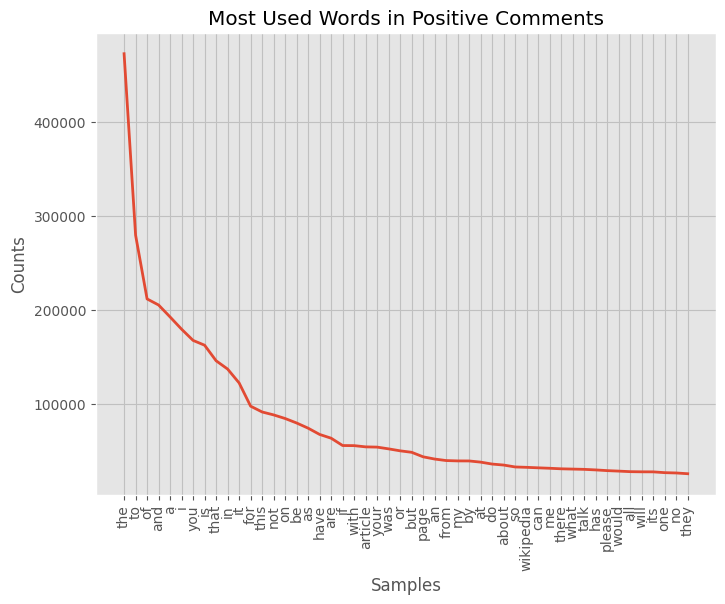

In [11]:
positiveFD = nltk.FreqDist(word for text in positive['cleaned_comment_text'] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in negative['cleaned_comment_text'] for word in text.lower().split())

plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Comments")
positiveFD.plot(50)
plt.show()

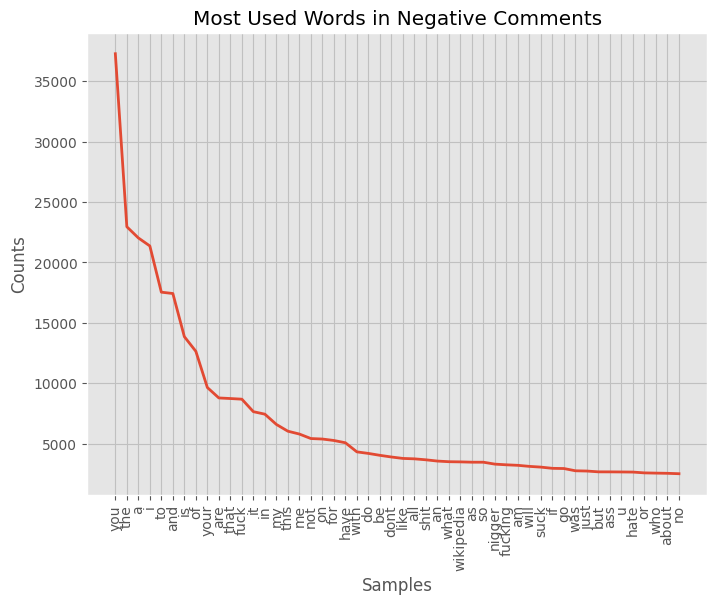

In [12]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Comments")
negativeFD.plot(50)
plt.show()

In [13]:
def process_text(texts):

    lemma = WordNetLemmatizer()
    swords = set(nltk.corpus.stopwords.words("english"))

    processed_data = []
    for text in texts:
        # Tokenize the text
        tokens = nltk.word_tokenize(text)

        # Lemmatize and remove stopwords
        tokens = [lemma.lemmatize(word) for word in tokens if word not in swords]

        processed_text = " ".join(tokens)
        processed_data.append(processed_text)

    print("Text processing (tokenizing, lemmatizing, stopwords removal) complete!")
    return processed_data

df['processed_comment_text'] = process_text(df['cleaned_comment_text'])

df.to_csv("cleaned_train.csv", index=False)

df.head()

Text processing (tokenizing, lemmatizing, stopwords removal) complete!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comment_text,processed_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...,daww match background colour im seemingly stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cant make any real suggestions on impr...,cant make real suggestion improvement wondered...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,sir hero chance remember page thats


In [14]:
# Encode labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
X = df['processed_comment_text'].values
y = df[labels].values

Class Distribution (Number of samples per label):
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


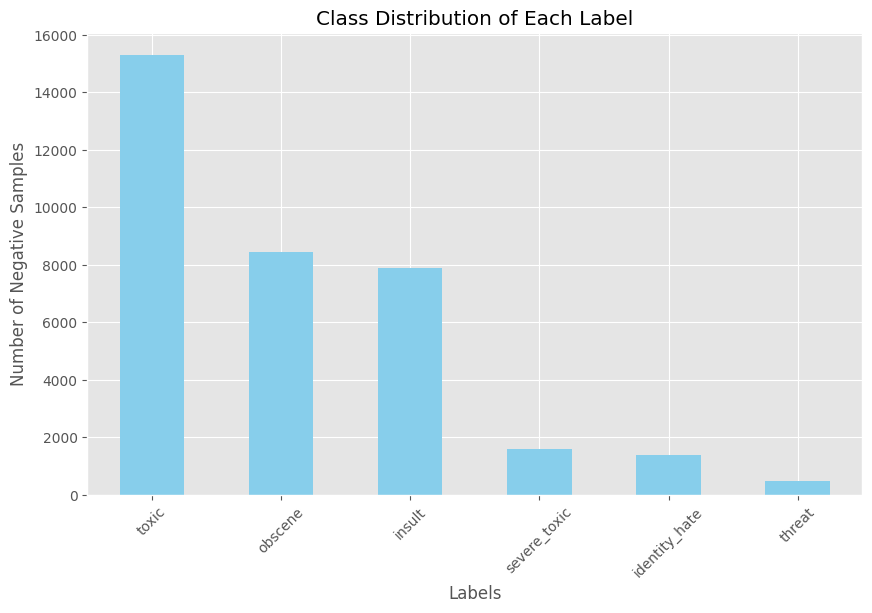

In [15]:
# Check the distribution of labels for each class (column)
label_counts = df[labels].sum(axis=0)  # Sum of 1s for each label column
label_counts = label_counts.sort_values(ascending=False)

# Display the distribution for each label
print("Class Distribution (Number of samples per label):")
print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Each Label')
plt.xlabel('Labels')
plt.ylabel('Number of Negative Samples')
plt.xticks(rotation=45)
plt.show()